In [1]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import itertools    
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix    

import pathlib

In [2]:
# Code to check if GPU is peresent and available for training

tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# Modify this path to point it to the folder location where the dataset would be residing

data_dir = pathlib.Path('/content/drive/MyDrive/CV/handwritten-math-symbols/dataset')

In [4]:
# Checking the total count of all the images present in the dataset

image_count = len(list(data_dir.glob('*/*.*')))
print("Total no of images =",image_count)

Total no of images = 10072


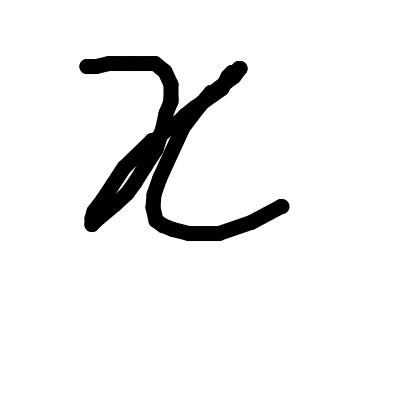

In [5]:
# Visualising one of the images from the dataset, here in particular from the class "x"

digits = list(data_dir.glob('x/*'))
PIL.Image.open(str(digits[0]))

In [6]:
# Setting parameters for dataset loaders, resizing immages to 100x100

batch_size = 32
img_height = 100
img_width = 100

In [7]:
# Getting the tain dataset ready

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  #color_mode="grayscale",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10071 files belonging to 19 classes.
Using 8057 files for training.


In [8]:
# Getting the validation dataset ready

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  #color_mode="grayscale",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10071 files belonging to 19 classes.
Using 2014 files for validation.


In [9]:
# Exploring all the classes in the dataset

class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'dec', 'div', 'eq', 'mul', 'sub', 'x', 'y', 'z']


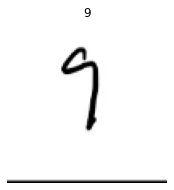

In [10]:
# Visualising one of the data from the dataset alog with its class label to ensure that there are no discrepancies

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(1):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
# Creating the model and setting appropriate classes so that classification is for that number of classes

num_classes = 19
img_channels = 3

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape=(img_height, img_width, img_channels)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes),
  #keras.layers.Dense(num_classes, activation='softmax')
])

In [12]:
# Compiing the model with appropriate optimizer and loss function, also setting the metrics to be captured during training

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# Summarizing the model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [15]:
# Training the model with train and val data set to evaluate train and val accuracies

epochs = 5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
252/252 [==============================] - 24s 94ms/step - loss: 0.2118 - accuracy: 0.9336 - val_loss: 0.5567 - val_accuracy: 0.8729
Epoch 2/5
252/252 [==============================] - 16s 64ms/step - loss: 0.1964 - accuracy: 0.9382 - val_loss: 0.5461 - val_accuracy: 0.8719
Epoch 3/5
252/252 [==============================] - 16s 63ms/step - loss: 0.1290 - accuracy: 0.9568 - val_loss: 0.5483 - val_accuracy: 0.8784
Epoch 4/5
252/252 [==============================] - 16s 63ms/step - loss: 0.1578 - accuracy: 0.9537 - val_loss: 0.5638 - val_accuracy: 0.8803
Epoch 5/5
252/252 [==============================] - 16s 62ms/step - loss: 0.1185 - accuracy: 0.9630 - val_loss: 0.5509 - val_accuracy: 0.8913


In [16]:
# Saving the model so that it can be used for evaluation at later point

model.save('/content/drive/MyDrive/CV/models/model.h5')

In [20]:
model = keras.models.load_model('/content/drive/MyDrive/CV/models/model.h5')

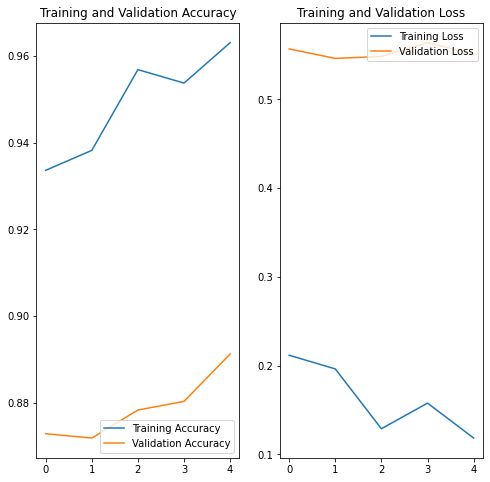

In [21]:
# Plootting the accuracies and losses from the trained model for both train and val data

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

63/63 [==============================] - 3s 38ms/step


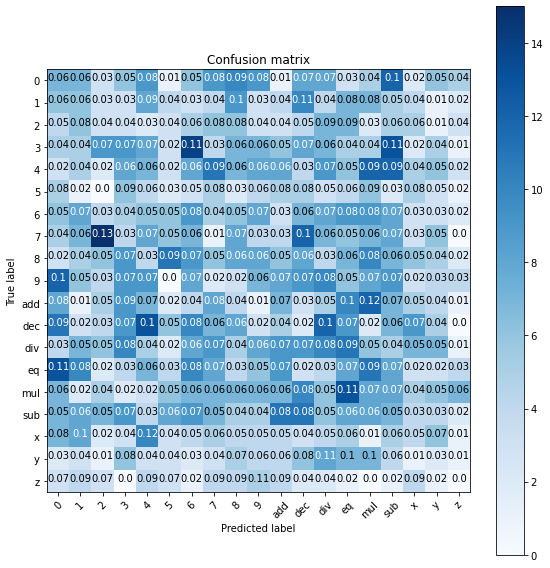

In [22]:
# A method that helps us in generating a confusion matrix for the set of classes present in the dataset

def plot_confusion_matrix(cm, class_names):
  """
  Returns a matplotlib figure containing the plotted confusion matrix.

  Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
  """
  figure = plt.figure(figsize=(8, 8))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names)

  # Compute the labels from the normalized confusion matrix.
  labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

  # Use white text if squares are dark; otherwise black.
  threshold = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > threshold else "black"
    plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  return figure

y_pred = model.predict(val_ds)
y_pred = tf.nn.softmax(y_pred)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in val_ds], axis=0)
cm = confusion_matrix(predicted_categories, true_categories)
figure = plot_confusion_matrix(cm, class_names)